In [1]:
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck')

from halotools.utils import SampleSelector

hosts, subs = SampleSelector.host_halo_selection(table=halocat.halo_table, return_subhalos=True)

In [3]:
from halotools.mock_observables import hod_from_mock

log10_msub_min = 10.75
log10_mhost_min, log10_mhost_max = max(11.25, log10_msub_min), 14.75
num_mhost_bins = 25
subhalo_mpeak_cut = 10**log10_msub_min
subhalo_sample_mask = subs['halo_mpeak'] > subhalo_mpeak_cut
haloprop_bins = np.logspace(log10_msub_min, log10_mhost_max, num_mhost_bins)
mean_occupation_bolshoi, bin_edges = hod_from_mock(subs['halo_mvir_host_halo'][subhalo_sample_mask], 
                                           hosts['halo_mvir'], haloprop_bins)

log10_bin_mids = 0.5*(np.log10(haloprop_bins[:-1]) + np.log10(haloprop_bins[1:]))
bin_mids = 10**log10_bin_mids

In [27]:
from jiang_usmf import monte_carlo_subhalo_population

beta_jiang14 = 5.67
zeta_jiang14 = 1.19
gamma1_jiang14 = 0.13
alpha1_jiang14 = -0.83
gamma2_jiang14 = 1.33
alpha2_jiang14 = -0.02

mc_nsub1, mc_subhalo_mpeak1 = monte_carlo_subhalo_population(hosts['halo_mvir'], 
                                                           log10_msub_min, 
                                                           np.log10(bin_edges))
mean_occupation_model1, bin_edges = hod_from_mock(np.repeat(hosts['halo_mvir'], mc_nsub1), 
                                           hosts['halo_mvir'], haloprop_bins)

mc_nsub2, mc_subhalo_mpeak2 = monte_carlo_subhalo_population(hosts['halo_mvir'], 
                                                           log10_msub_min, 
                                                           np.log10(bin_edges), 
                                                            alpha1=-0.925, 
                                                            gamma2=0.5)
mean_occupation_model2, bin_edges = hod_from_mock(np.repeat(hosts['halo_mvir'], mc_nsub2), 
                                           hosts['halo_mvir'], haloprop_bins)

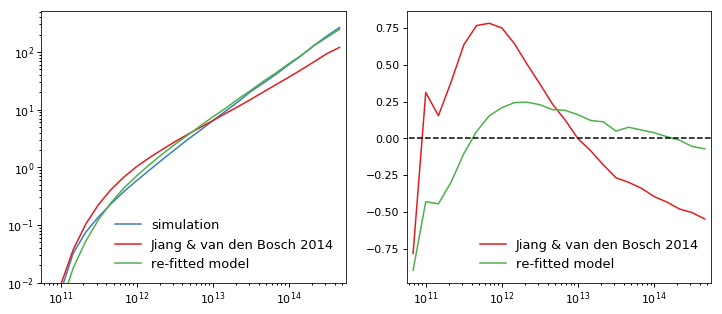

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

__=ax1.loglog()
__=ax1.plot(bin_mids, mean_occupation_bolshoi, label='simulation', color=blue)
__=ax1.plot(bin_mids, mean_occupation_model1, label='Jiang & van den Bosch 2014', color=red)
__=ax1.plot(bin_mids, mean_occupation_model2, label='re-fitted model', color=green)

xscale2 = ax2.set_xscale('log')
fracdiff1 = (mean_occupation_model1 - mean_occupation_bolshoi)/mean_occupation_bolshoi
fracdiff2 = (mean_occupation_model2 - mean_occupation_bolshoi)/mean_occupation_bolshoi

__=ax2.plot(bin_mids, fracdiff1, label='Jiang & van den Bosch 2014', color=red)
__=ax2.plot(bin_mids, fracdiff2, label='re-fitted model', color=green)
__=ax2.plot(np.logspace(log10_mhost_min-1, log10_mhost_max+1, 100), np.zeros(100), '--', color='k')

xlim2 = ax2.set_xlim(xmin=10**(log10_mhost_min-0.5), xmax=10**log10_mhost_max)
xlim1 = ax1.set_xlim(xmin=10**(log10_mhost_min-0.5), xmax=10**log10_mhost_max)
ylim1 = ax1.set_ylim(ymin=0.01)


legend1 = ax1.legend()
legend2 = ax2.legend()

